In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## G0の定義
(続わかパタに準拠）

In [25]:
#一回しか回さないので着座したテーブルがなくなるといことがないと過程

class DP:
    def __init__(self,alpha):
        self.alpha = alpha
        
        self.theta = {}
        self.ni = []
        self.theta_class = []
        self.theta_i = []
        
        
    def sample_from_base(self):
        p = np.random.uniform()
        new_class = len(self.ni)
        
        if 0<=p<=2/3:
            self.theta[new_class] = np.sqrt(8*p/3)
        else:
            self.theta[new_class] = 2*(1-np.sqrt((1-p)/3))
        
        self.ni.append(1)
        self.theta_class.append(new_class)
        self.theta_i.append(self.theta[new_class])
            
        
        
    
    def sample_from_emprical(self):
        n = len(self.theta)
        ni = np.array(self.ni)
        p_z = ni/ni.sum()
        z = np.random.multinomial(1,p_z).argmax()
        
        self.ni[z] += 1
        self.theta_class.append(z)
        self.theta_i.append(self.theta[z])
        
        
        
        
    def sample_theta(self,n):
        threshold = np.random.uniform()
        if threshold <= self.alpha/(self.alpha+n-1):
            self.sample_from_base()
            
        else:
            self.sample_from_emprical()
            
            
        
                       
        
        
            
        
    

100%|██████████| 500/500 [00:15<00:00, 31.91it/s]


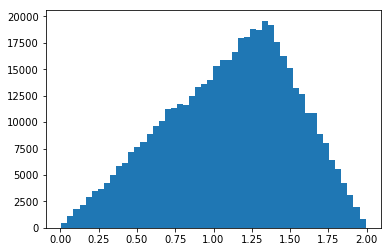

In [52]:
theta = []
for _ in tqdm(range(500)):
    dp = DP(100)
    for n in range(1,1000):
        dp.sample_theta(n)
        #print("c = {}".format(len(dp.ni)))
    theta+=dp.theta_i
plt.hist(theta,bins=50)
plt.show()